# Chapter 10
# Simulation
## 10.1 Reasoning in reverse
- In Chapter 1 of this book we stated a simple truth: <br>**The purpose of data science is to turn data into usable information.**


- So, **Data → Understanding**


- However, This chapter is about computing techniques relating to the reverse way of thinking: **Speculation → Data.** In other words, this chapter is about **“making up data.”**



#### **즉, 데이터를 해석하는 것이 아니라 해석을 위한 올바른 데이터 생성**

## 10.2 Extended example: Grouping cancers

In [1]:
import os
import warnings

In [2]:
dataset = "NCI60.csv"
# currnet file directory
wd = os.getcwd()

In [3]:
import pandas as pd # data processing, CSV file I/O
import numpy as np

# read the dataset
NCI60=pd.read_csv(os.path.join(wd, dataset))

In [4]:
NCI60.shape

(41078, 61)

### About Data 
- n = 60 different cell lines of cancer of different tissue types
- p > 40, 000 different probes

**Our job might be to find relationships between different cell lines based on the patterns of probe expression**

In [5]:
NCI60.head(5)

,Probe,BR.MCF7,BR.MDA_MB_231,BR.HS578T,BR.BT_549,BR.T47D,CNS.SF_268,CNS.SF_295,CNS.SF_539,CNS.SNB_19,...,PR.PC_3,PR.DU_145,RE.786_0,RE.A498,RE.ACHN,RE.CAKI_1,RE.RXF_393,RE.SN12C,RE.TK_10,RE.UO_31
0,AT_D_3,-7.45,-7.51,-7.30,-7.37,-6.15,-7.16,-7.03,-7.44,-7.43,...,-6.88,-6.78,-7.25,-7.17,-6.51,-6.66,-6.53,-6.86,-7.03,-6.85
1,AT_D_5,-7.05,-6.62,-6.88,-6.78,-7.18,-7.25,-7.22,-7.37,-7.26,...,-6.27,-7.04,-6.68,-6.83,-6.65,-6.61,-6.23,-6.74,-6.85,-6.67
2,AT_D_M,-7.05,-7.29,-7.30,-7.37,-7.61,-6.56,-7.63,-7.44,-7.43,...,-6.45,-7.29,-7.25,-7.14,-6.53,-6.93,-6.17,-7.20,-6.93,-6.85
3,AT_L_3,-7.32,-7.01,-7.22,-6.60,-7.45,-7.00,-7.32,-7.27,-7.39,...,-6.30,-7.01,-6.73,-6.50,-6.37,-6.54,-7.07,-6.86,-6.55,-6.67
4,AT_L_5,-7.38,-7.22,-7.30,-7.37,-7.70,-7.25,-7.61,-7.44,-7.43,...,-6.48,-7.15,-7.06,-6.44,-6.47,-6.62,-7.00,-7.22,-6.89,-6.36


In [6]:
NCI60.columns[1:]

Index(['BR.MCF7', 'BR.MDA_MB_231', 'BR.HS578T', 'BR.BT_549', 'BR.T47D',
       'CNS.SF_268', 'CNS.SF_295', 'CNS.SF_539', 'CNS.SNB_19', 'CNS.SNB_75',
       'CNS.U251', 'CO.COLO205', 'CO.HCC_2998', 'CO.HCT_116', 'CO.HCT_15',
       'CO.HT29', 'CO.KM12', 'CO.SW_620', 'LE.CCRF_CEM', 'LE.HL_60',
       'LE.K_562', 'LE.MOLT_4', 'LE.RPMI_8226', 'LE.SR', 'ME.LOXIMVI',
       'ME.MALME_3M', 'ME.M14', 'ME.SK_MEL_2', 'ME.SK_MEL_28', 'ME.SK_MEL_5',
       'ME.UACC_257', 'ME.UACC_62', 'ME.MDA_MB_435', 'ME.MDA_N', 'LC.A549',
       'LC.EKVX', 'LC.HOP_62', 'LC.HOP_92', 'LC.NCI_H226', 'LC.NCI_H23',
       'LC.NCI_H322M', 'LC.NCI_H460', 'LC.NCI_H522', 'OV.IGROV1', 'OV.OVCAR_3',
       'OV.OVCAR_4', 'OV.OVCAR_5', 'OV.OVCAR_8', 'OV.SK_OV_3',
       'OV.NCI_ADR_RES', 'PR.PC_3', 'PR.DU_145', 'RE.786_0', 'RE.A498',
       'RE.ACHN', 'RE.CAKI_1', 'RE.RXF_393', 'RE.SN12C', 'RE.TK_10',
       'RE.UO_31'],
      dtype='object')

#### Probe에 대해서 각 cell line 값들의 분산을 알아보기 위해, column들을 probe에 따라 합침
- *pd.melt를 활용*

In [7]:
Spreads = pd.melt(NCI60, id_vars=['Probe'], value_vars=NCI60.columns[1:], 
                  var_name='cellLine', value_name='value')
Spreads.head(5)

,Probe,cellLine,value
0,AT_D_3,BR.MCF7,-7.45
1,AT_D_5,BR.MCF7,-7.05
2,AT_D_M,BR.MCF7,-7.05
3,AT_L_3,BR.MCF7,-7.32
4,AT_L_5,BR.MCF7,-7.38


In [8]:
aggregations = {
    "cellLine": "count",
    "value": "std"
}

Spreads = Spreads.groupby("Probe").agg(aggregations)
Spreads.head(5)

,cellLine,value
Probe,,
3.8-1,60,0.978317
7A5,60,2.350812
A1BG,120,3.177611
A2BP1,120,0.787162
A2M,60,3.413165


### 최종적으로 각 Probe에 대해서 cellLine들의 std DataFrame 완성 

In [9]:
Spreads = Spreads.sort_values(by=["value"], ascending=False)
Spreads.head(5)

,cellLine,value
Probe,,
LBX1,120,7.172505
DRD4,120,6.842240
CRTC1,180,6.658073
CACNA1I,120,6.448891
C18orf23,120,6.381418


### 다음은 기존 NC160 데이터에서 Probe를 무작위로 섞어서 데이터 산출
- 그리고 위와 같은 과정으로 std를 뽑아낸다

In [10]:
probe = pd.DataFrame(NCI60["Probe"].reindex(np.random.permutation(NCI60["Probe"].index)))
probe = probe.reset_index(drop=True)
probe.head(5)

,Probe
0,A_32_P122323
1,YIPF5
2,A_24_P409166
3,PRLH
4,DBNDD2


In [11]:
NCI60.head(3)

,Probe,BR.MCF7,BR.MDA_MB_231,BR.HS578T,BR.BT_549,BR.T47D,CNS.SF_268,CNS.SF_295,CNS.SF_539,CNS.SNB_19,...,PR.PC_3,PR.DU_145,RE.786_0,RE.A498,RE.ACHN,RE.CAKI_1,RE.RXF_393,RE.SN12C,RE.TK_10,RE.UO_31
0,AT_D_3,-7.45,-7.51,-7.30,-7.37,-6.15,-7.16,-7.03,-7.44,-7.43,...,-6.88,-6.78,-7.25,-7.17,-6.51,-6.66,-6.53,-6.86,-7.03,-6.85
1,AT_D_5,-7.05,-6.62,-6.88,-6.78,-7.18,-7.25,-7.22,-7.37,-7.26,...,-6.27,-7.04,-6.68,-6.83,-6.65,-6.61,-6.23,-6.74,-6.85,-6.67
2,AT_D_M,-7.05,-7.29,-7.30,-7.37,-7.61,-6.56,-7.63,-7.44,-7.43,...,-6.45,-7.29,-7.25,-7.14,-6.53,-6.93,-6.17,-7.20,-6.93,-6.85


In [12]:
# 무작위로 섞은 Probe 데이터를 기존 DataFrame에 넣어준다.
NCI60.update(probe)
NCI60.head(3)

,Probe,BR.MCF7,BR.MDA_MB_231,BR.HS578T,BR.BT_549,BR.T47D,CNS.SF_268,CNS.SF_295,CNS.SF_539,CNS.SNB_19,...,PR.PC_3,PR.DU_145,RE.786_0,RE.A498,RE.ACHN,RE.CAKI_1,RE.RXF_393,RE.SN12C,RE.TK_10,RE.UO_31
0,A_32_P122323,-7.45,-7.51,-7.30,-7.37,-6.15,-7.16,-7.03,-7.44,-7.43,...,-6.88,-6.78,-7.25,-7.17,-6.51,-6.66,-6.53,-6.86,-7.03,-6.85
1,YIPF5,-7.05,-6.62,-6.88,-6.78,-7.18,-7.25,-7.22,-7.37,-7.26,...,-6.27,-7.04,-6.68,-6.83,-6.65,-6.61,-6.23,-6.74,-6.85,-6.67
2,A_24_P409166,-7.05,-7.29,-7.30,-7.37,-7.61,-6.56,-7.63,-7.44,-7.43,...,-6.45,-7.29,-7.25,-7.14,-6.53,-6.93,-6.17,-7.20,-6.93,-6.85


In [13]:
Sim_Spreads = pd.melt(NCI60, id_vars=['Probe'], value_vars=NCI60.columns[1:], 
                  var_name='cellLine', value_name='value')
aggregations = {
    "cellLine": "count",
    "value": "std"
}

Sim_Spreads = Sim_Spreads.groupby("Probe").agg(aggregations)

Sim_Spreads = Sim_Spreads.sort_values(by=["value"], ascending=False)
Sim_Spreads.head(5)

,cellLine,value
Probe,,
MRPL52,120,7.314591
IL18R1,120,7.208159
IGLV6-57,120,7.207677
FAM92A1,120,7.142530
OMA1,120,7.127439


## 10.3	Randomizing functions

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

[Text(0, 0.5, 'spread'), Text(0.5, 0, 'order')]

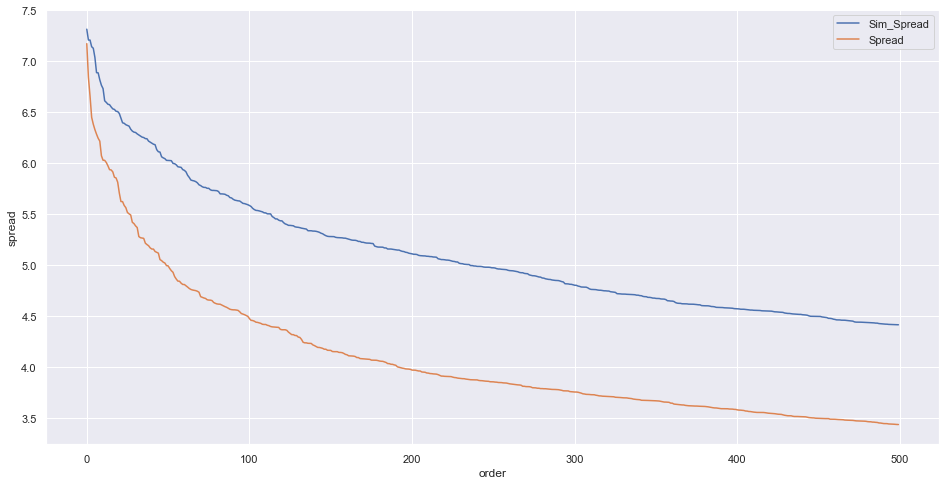

In [15]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x = np.arange(500), y = Sim_Spreads[0:500]["value"].values, label="Sim_Spread")
ax = sns.lineplot(x = np.arange(500), y = Spreads[0:500]["value"].values, label="Spread")

ax.set(xlabel = "order", ylabel = "spread")
#plt.xlabel("order")
#plt.ylabel("spread")

### 의문 - 도대체 왜 교과서와 그림이 다른 것 일까?

- 아무튼 교재에서는 무작위로 섞게 되면 좋은 것이 아니라,
- 오히려 값들의 표준 편차 폭이 작아져서 데이터 손실이 일어난다.

## 10.4	Simulating variability
### 10.4.1	The partially planned rendezvous
### Uniform Distribution
- 셀리와 조안이 도착하는 시간을 균일 분포로 표현

In [16]:
sally = np.random.uniform(0, 60, 100000)
joan = np.random.uniform(0, 60, 100000)

In [17]:
sim_meet = pd.DataFrame({
    "sally": sally,
    "joan": joan
})

In [18]:
sim_meet.head(3)

,sally,joan
0,48.690657,24.681014
1,53.340847,4.078552
2,50.832560,19.637031


#### 조건에 따라 만나고 만나지 않고 태깅

In [19]:
sim_meet.loc[abs(sim_meet["sally"] - sim_meet["joan"]) <= 10, "result"] = "They meet"
sim_meet.loc[abs(sim_meet["sally"] - sim_meet["joan"]) > 10, "result"] = "They do not"

#### 이론적으로 계산한 확률과 같은 값이 나옴

In [20]:
sim_meet["result"].value_counts(normalize=True)

They do not    0.69566
They meet      0.30434
Name: result, dtype: float64

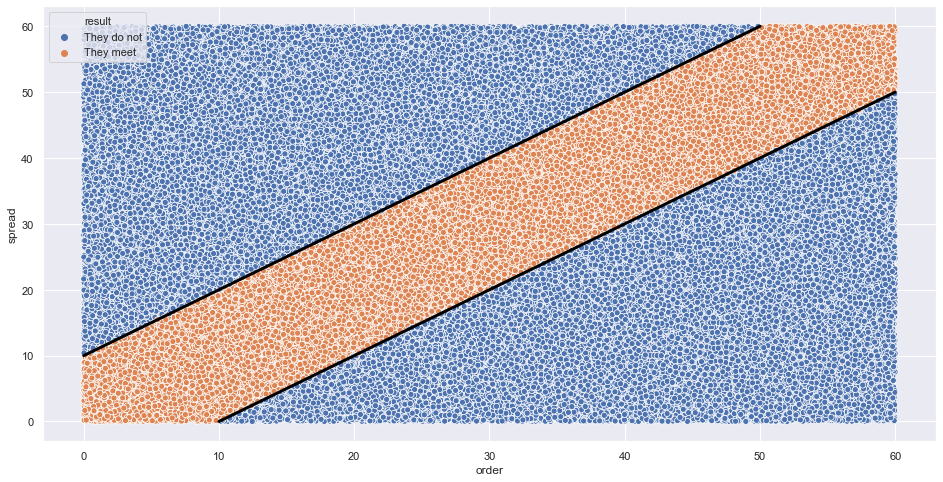

In [21]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x="joan", y="sally", hue="result", data=sim_meet)
ax.set(xlabel = "order", ylabel = "spread")
plt.plot([10, 60], [0, 50], color="black", linewidth=3)
plt.plot([0, 50], [10, 60], color="black", linewidth=3)

### 10.4.2	The jobs report
### Normal Distribution
- 정규 분포 간단한 개념에 대해 설명하는데,
- 책에서는 함수로써 인자를 넣어서 반복 실험하는 것을 시뮬레이션이라고 표현하면서 자세하게 설명

In [22]:
mu, sigma = 150, 65 # mean and standard deviation
s1 = np.random.normal(mu, sigma, 12)
s2 = np.random.normal(mu, sigma, 12)
s3 = np.random.normal(mu, sigma, 12)
t = np.random.normal(mu, 0, 12)

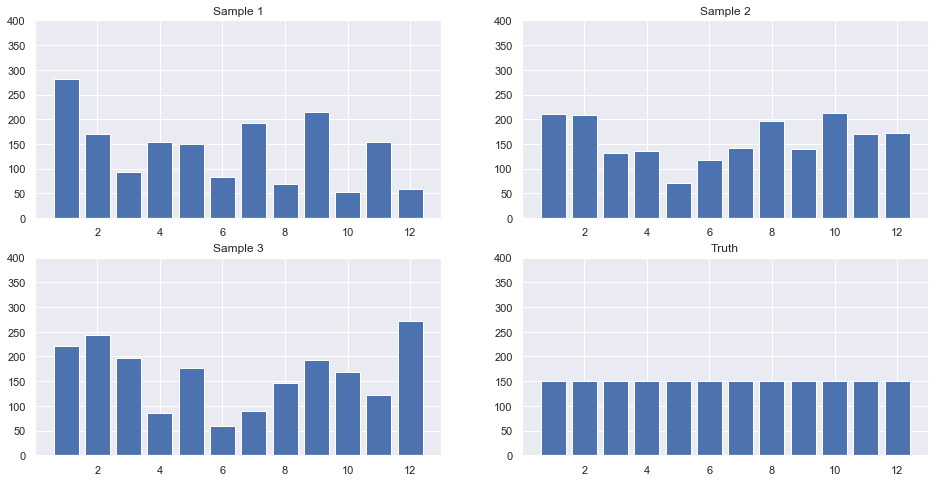

In [23]:
baseline = ["Sample 1", "Sample 2", "Sample 3", "Truth"]
plt.figure(figsize=(16, 8))

for n, v in enumerate([s1, s2, s3, t]):
    ax = plt.subplot(2 ,2, n + 1)
    ax.set_ylim(0, 400)
    ax.bar(np.arange(1,13), v)
    ax.set_title(baseline[n])

### 10.4.3	Restaurant health and sanitation grades
### Binomial Distribution
- rflip() 이라는 함수 설명과 함께 동전 던지기에 비유하면서 이항분포를 설명한다.

In [24]:
dataset = "Violations.csv"
wd = os.getcwd()

Violations=pd.read_csv(os.path.join(wd, dataset), encoding = "ISO-8859-1")

In [25]:
Violations.head(3)

,camis,dba,boro,building,street,zipcode,phone,inspection_date,action,violation_code,score,grade,grade_date,record_date,inspection_type,cuisine_code
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007.0,MORRIS PARK AVE,10462,7.188925e+09,2015-02-09,Violations were cited in the following area(s).,06C,6.0,A,2015-02-09,2016-01-06,Cycle Inspection / Initial Inspection,8
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007.0,MORRIS PARK AVE,10462,7.188925e+09,2014-03-03,Violations were cited in the following area(s).,10F,2.0,A,2014-03-03,2016-01-06,Cycle Inspection / Initial Inspection,8
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007.0,MORRIS PARK AVE,10462,7.188925e+09,2013-10-10,No violations were recorded at the time of thi...,NaN,NaN,NaN,NaN,2016-01-06,Trans Fat / Second Compliance Inspection,8


#### 데이터 정제하는 부분
- Score 조건
- dba & score column만 선택
- 중복 데이터 제거
- index 순서 다시 0부터 정의

In [26]:
Violations = Violations[(Violations["score"] >= 7) & (Violations["score"] <= 19)]
Violations = Violations[["dba", "score"]].dropna()
Violations = Violations.drop_duplicates()
Violations = Violations.reset_index(drop=True)

In [27]:
Violations = Violations.drop_duplicates()
Violations = Violations.reset_index(drop=True)

#### score 값을 각각 count한 결과 생성

In [28]:
Violations_Count = pd.DataFrame(Violations["score"].value_counts()).reset_index()
Violations_Count = Violations_Count.rename(columns={ "index": "score", "score": "count"})

Text(0.8, 0.95, 'A grade:score of 13 or less')

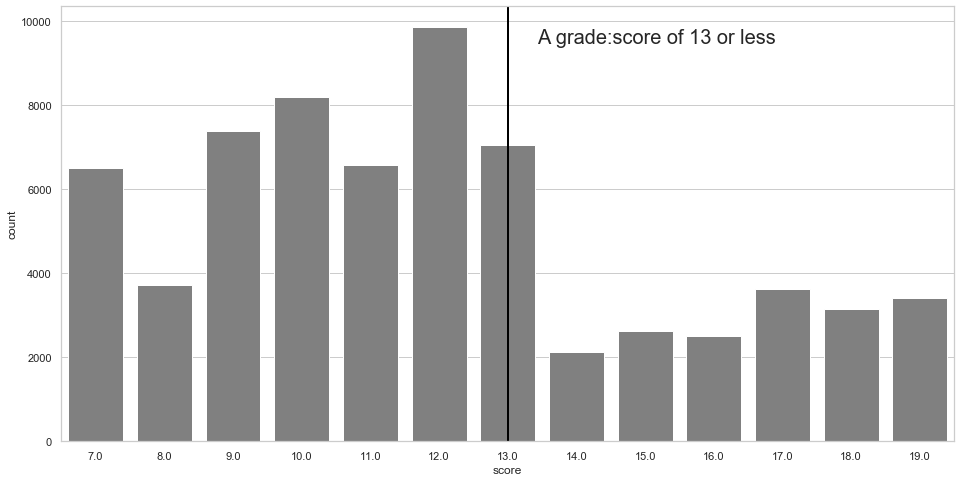

In [29]:
text = "A grade:score of 13 or less"
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

ax = sns.barplot(x="score", y="count", data=Violations_Count, color="gray")
ax.axvline(Violations_Count["score"].mean() - 7, color='black', linewidth=2)
ax.annotate(text, xy=(3, 1),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            size=20
            )

### flip a fair coin that determines whether a grade is a 14 (heads) or 13 (tails).
- 아마도 데이터 값이 급격히 변화하는 13과 14 부분에서 실제로 상황에 따라 14일 때 값이 클수도 있으니,
- 평균적인 값을 찾기 위해서 이항 분포로 가정하고 값을 생성해보는 듯 하다.

In [30]:
Count_13 = Violations_Count[Violations_Count["score"] == 13]["count"].iloc[0]
Count_14 = Violations_Count[Violations_Count["score"] == 14]["count"].iloc[0]
(Count_13, Count_14)

(7063, 2127)

#### 동전 던지기에서 Head 부분만을 결과로 저장
#### 즉, 이항분포에서 1일때만 저장

In [31]:
head_result = []

probability = .5
#num of flips required. This can be changed.
n = Count_13 + Count_14
for i in range(1000):
    array = np.random.binomial(1, 0.5, n)
    head_result.append(np.count_nonzero(array))

In [32]:
head_result[:5]

[4669, 4618, 4658, 4702, 4572]

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'Number of restaurants with scores of 14 (if equal probability)')]

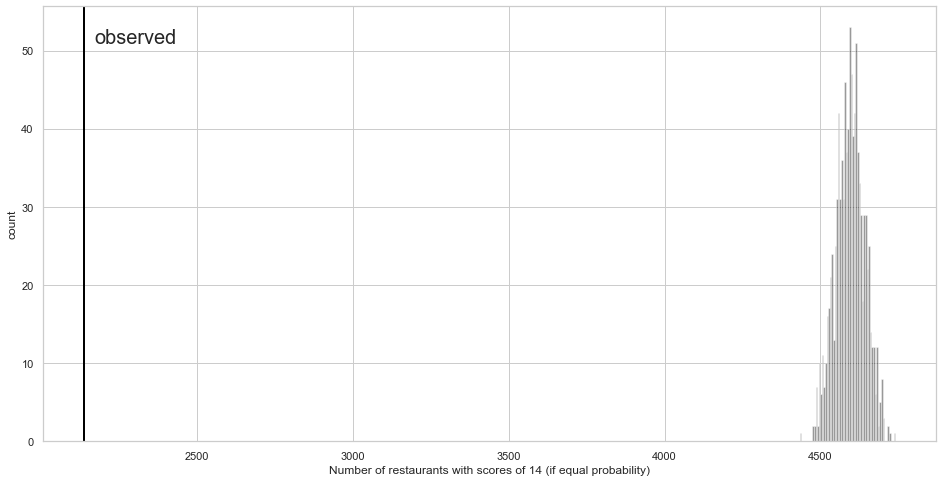

In [33]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

text = "observed"

ax = sns.distplot(head_result, bins=60, kde=False, color="black")
ax.axvline(2137, color='black', linewidth=2)
ax.annotate(text, xy=(2137, 1),  xycoords='data',
            xytext=(0.15, 0.95), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            size=20
            )
ax.set(xlabel = "Number of restaurants with scores of 14 (if equal probability)", ylabel = "count")

## 10.5	Simulating a complex system
- 앞부분과 뒷부분으로 충분히 커버. So, Pass...

## 10.6	Random networks
## 10.7	Key principles of simulation

In [40]:
num_sim = [100, 400, 1600]
columns = ["100", "400", "1600"]
result = {
    "100": [],
    "400": [],
    "1600": []
}

for i, num in enumerate(num_sim):
    for rep in range(5000):
        sally = np.random.uniform(0, 60,num)
        joan = np.random.uniform(0, 60, num)
        sim_meet = pd.DataFrame({ "sally": sally, "joan": joan })
        sim_meet = sim_meet[abs(sim_meet["sally"] - sim_meet["joan"]) <= 10]
        result[columns[i]].append(abs(sim_meet["sally"] - sim_meet["joan"]).count() / num)
        
    

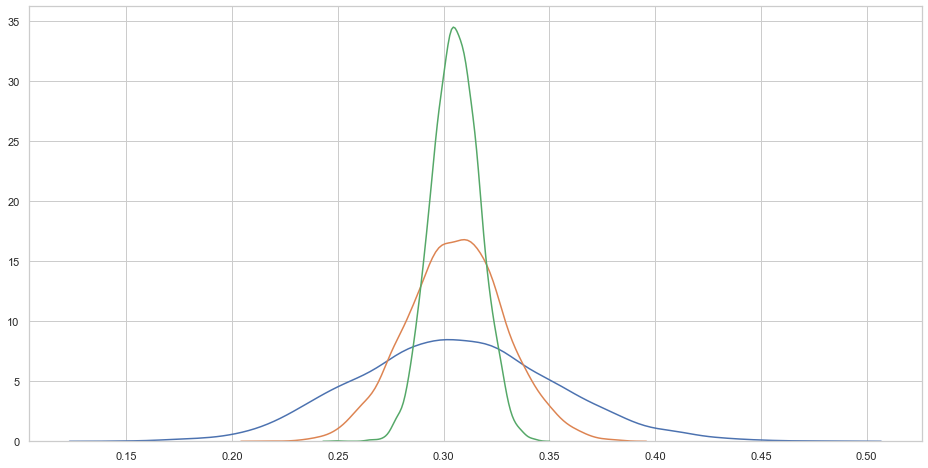

In [41]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

for key in result.keys():
    sns.distplot(result[key], hist=False)

In [42]:
pd.DataFrame(result).describe()

,100,400,1600
count,5000.000000,5000.000000,5000.000000
mean,0.305036,0.305757,0.305570
std,0.046558,0.023138,0.011339
min,0.150000,0.217500,0.249375
25%,0.270000,0.290000,0.298125
50%,0.300000,0.305000,0.305625
75%,0.340000,0.322500,0.313125
max,0.480000,0.382500,0.343750


In [ ]:
from scipy import stats
sally = np.random.uniform(0, 60, n)
stats.describe(sally)